In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras

Link  https://keras.io/datasets/#fashion-mnist-database-of-fashion-articles

Dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images. The class labels are:

| Label |	Description |
--- | --- |
| 0	| T-shirt/top
| 1	| Trouser
| 2	| Pullover
| 3	| Dress
| 4	| Coat
| 5	| Sandal
| 6	| Shirt
| 7	| Sneaker
| 8	| Bag
| 9	| Ankle boot


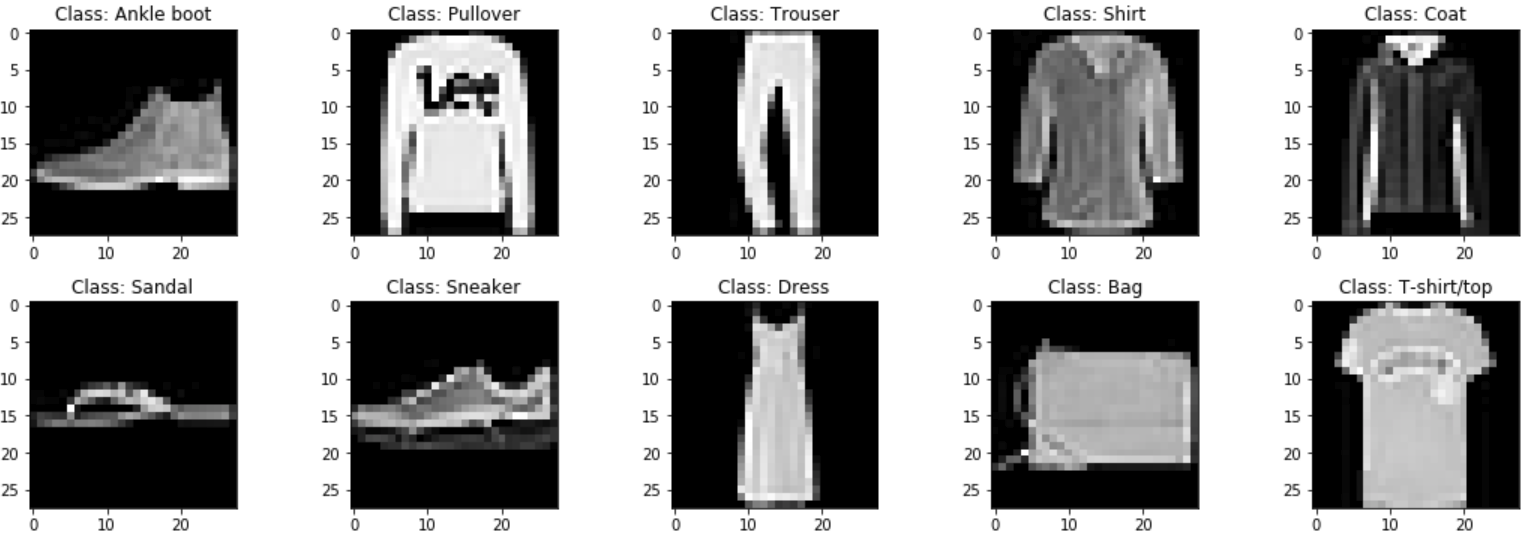

### Usage:
from keras.datasets import fashion_mnist

> (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Returns:
2 tuples:
1. x_train, x_test: uint8 array of grayscale image data with shape (num_samples, 28, 28).
2. y_train, y_test: uint8 array of labels (integers in range 0-9) with shape (num_samples,).

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

### Data Reshape

In [5]:
X_train_full = X_train_full.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))

### Data normalization
We then normalize the data dimensions so that they are of approximately the same scale.

In [6]:
X_train_n = X_train_full / 255.
X_test_n = X_test / 255.

### Split the data into train/validation/test datasets
In the earlier step of importing the date, we had 60,000 datasets for training and 10,000 test datasets. Now we further split the training data into train/validation. Here is how each type of dateset is used in deep learning:

* __Training data__ — used for training the model
* __Validation data__ — used for tuning the hyperparameters and evaluate the models
* __Test data__ — used to test the model after the model has gone through initial vetting by the validation set.

In [7]:
X_valid, X_train = X_train_n[:5000], X_train_n[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test_n

### Create the model architecture

In [8]:
np.random.seed(42)
tf.random.set_seed(42)

### Architecture


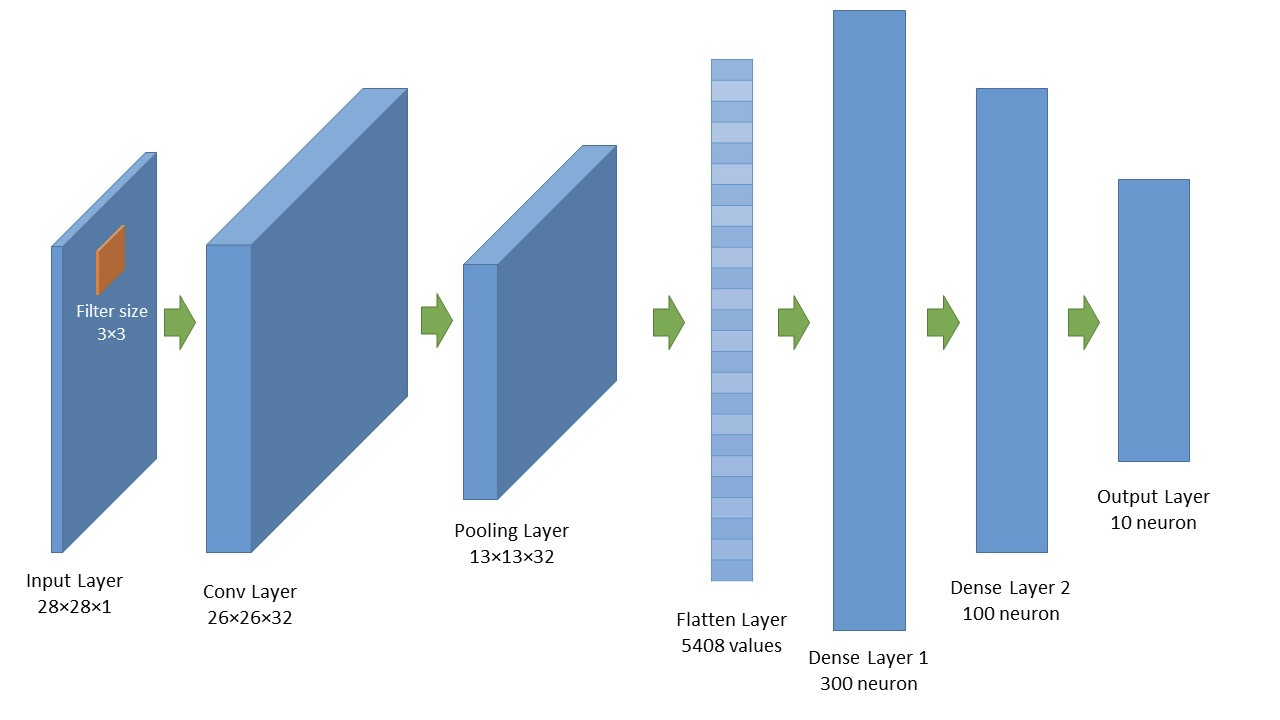

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), strides=1, padding='valid', activation='relu', input_shape=(28, 28, 1)))
model.add(keras.layers.MaxPooling2D((2, 2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 300)               1622700   
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                        

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [ ]:
model_history = model.fit(X_train, y_train, epochs=30,batch_size= 64,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
860/860 [==============================] - 26s 30ms/step - loss: 0.8270 - accuracy: 0.7163 - val_loss: 0.7506 - val_accuracy: 0.7252
Epoch 2/30
860/860 [==============================] - 21s 25ms/step - loss: 0.5282 - accuracy: 0.8092 - val_loss: 0.4873 - val_accuracy: 0.8202
Epoch 3/30
860/860 [==============================] - 24s 27ms/step - loss: 0.4711 - accuracy: 0.8306 - val_loss: 0.9579 - val_accuracy: 0.6934
Epoch 4/30
860/860 [==============================] - 21s 25ms/step - loss: 0.4346 - accuracy: 0.8451 - val_loss: 0.4082 - val_accuracy: 0.8592
Epoch 5/30
860/860 [==============================] - 20s 24ms/step - loss: 0.4119 - accuracy: 0.8516 - val_loss: 0.4166 - val_accuracy: 0.8530
Epoch 6/30
860/860 [==============================] - 21s 25ms/step - loss: 0.3885 - accuracy: 0.8608 - val_loss: 0.3716 - val_accuracy: 0.8712
Epoch 7/30
860/860 [==============================] - 21s 25ms/step - loss: 0.3718 - accuracy: 0.8674 - val_loss: 0.4065 - val_accuracy:

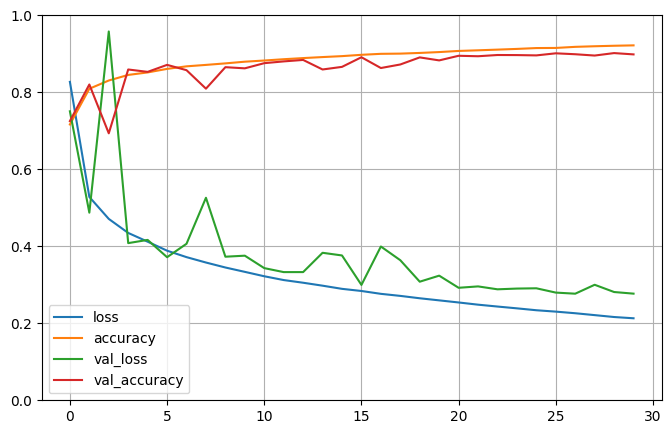

In [ ]:
import pandas as pd

pd.DataFrame(model_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
ev = model.evaluate(X_test_n, y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.2862 - accuracy: 0.8977


In [ ]:
ev

[0.28622889518737793, 0.8977000117301941]

In [ ]:
X_new = X_test[:3]

In [ ]:
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

1/1 [==============================] - 0s 110ms/step


array([9, 2, 1])

In [ ]:
y_test[:3]

array([9, 2, 1], dtype=uint8)

AxesImage(size=(28, 28))


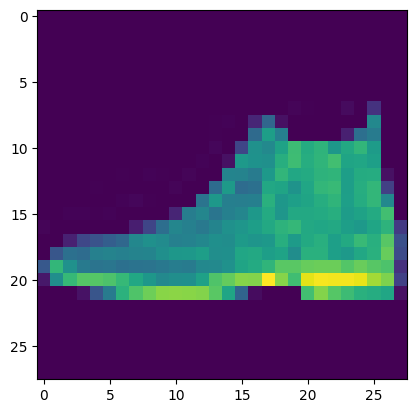

In [ ]:
print(plt.imshow(X_test[0].reshape((28,28))))

In [ ]:
keras.backend.clear_session

In [ ]:
del model

### Architecture - Pooling vs No Pooling


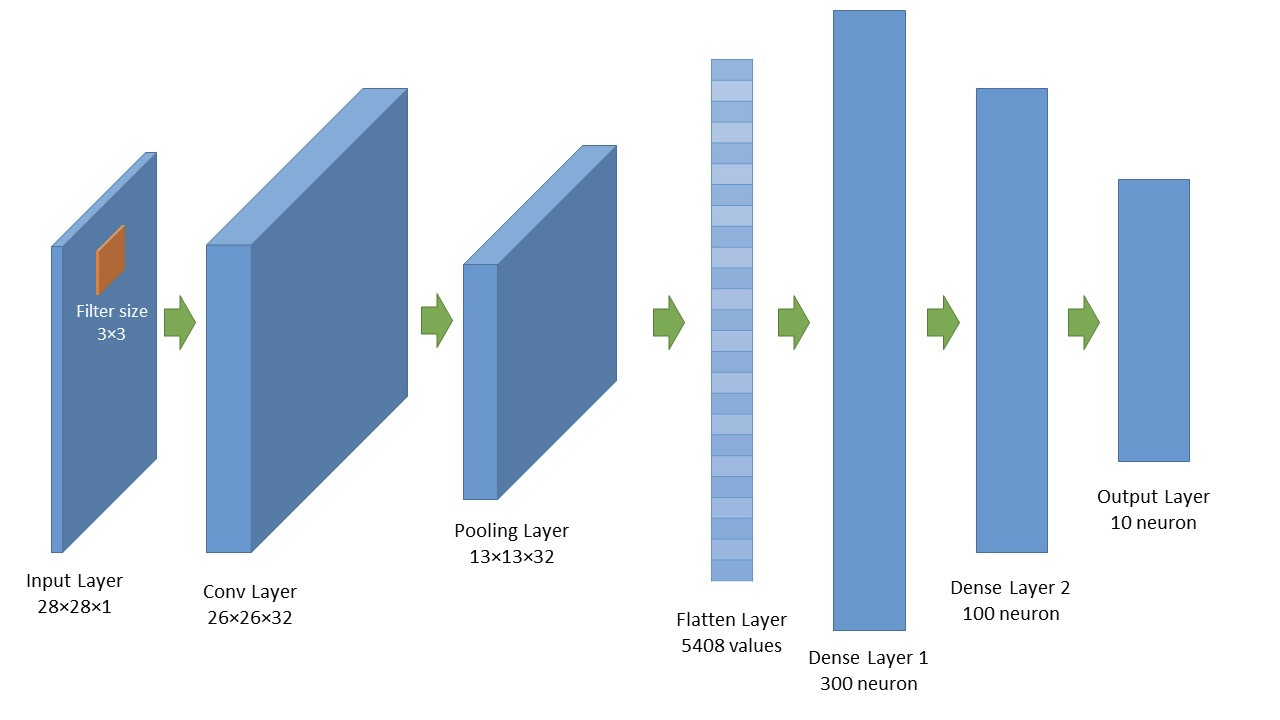

### Pooling vs No Pooling

In [9]:
model_a = keras.models.Sequential()
model_a.add(keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), strides=1, padding='valid', activation='relu', input_shape=(28, 28, 1)))
model_a.add(keras.layers.MaxPooling2D((2, 2)))
model_a.add(keras.layers.Flatten())
model_a.add(keras.layers.Dense(300, activation="relu"))
model_a.add(keras.layers.Dense(100, activation="relu"))
model_a.add(keras.layers.Dense(10, activation="softmax"))

model_b = keras.models.Sequential()
model_b.add(keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), strides=1, padding='valid', activation='relu', input_shape=(28, 28, 1)))
model_b.add(keras.layers.Flatten())
model_b.add(keras.layers.Dense(300, activation="relu"))
model_b.add(keras.layers.Dense(100, activation="relu"))
model_b.add(keras.layers.Dense(10, activation="softmax"))


In [10]:
model_a.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 300)               1622700   
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                        

In [11]:
model_b.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 flatten_1 (Flatten)         (None, 21632)             0         
                                                                 
 dense_3 (Dense)             (None, 300)               6489900   
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 6521330 (24.88 MB)
Trainable params: 6521330 (24.88 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
model_a.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

model_b.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [14]:
model_history_a = model_a.fit(X_train, y_train, epochs=3,batch_size= 64,
                    validation_data=(X_valid, y_valid))


Epoch 1/3
860/860 [==============================] - 39s 45ms/step - loss: 0.8449 - accuracy: 0.7144 - val_loss: 0.8138 - val_accuracy: 0.7104
Epoch 2/3
860/860 [==============================] - 40s 46ms/step - loss: 0.5323 - accuracy: 0.8083 - val_loss: 0.5075 - val_accuracy: 0.8078
Epoch 3/3
860/860 [==============================] - 38s 44ms/step - loss: 0.4772 - accuracy: 0.8281 - val_loss: 1.0444 - val_accuracy: 0.6750


In [15]:
model_history_b = model_b.fit(X_train, y_train, epochs=3,batch_size= 64,
                    validation_data=(X_valid, y_valid))

Epoch 1/3
860/860 [==============================] - 82s 95ms/step - loss: 0.7270 - accuracy: 0.7496 - val_loss: 0.6945 - val_accuracy: 0.7526
Epoch 2/3
860/860 [==============================] - 82s 95ms/step - loss: 0.4863 - accuracy: 0.8239 - val_loss: 0.4697 - val_accuracy: 0.8240
Epoch 3/3
860/860 [==============================] - 81s 94ms/step - loss: 0.4354 - accuracy: 0.8426 - val_loss: 0.9236 - val_accuracy: 0.7150
